In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hr_data = pd.read_csv('../input/human-resource/HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# we should probably rename this to something more intuitive like 'department'
hr_data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [4]:
hr_data['department'] = hr_data['sales']
hr_data.drop('sales', axis=1, inplace=True)

In [5]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


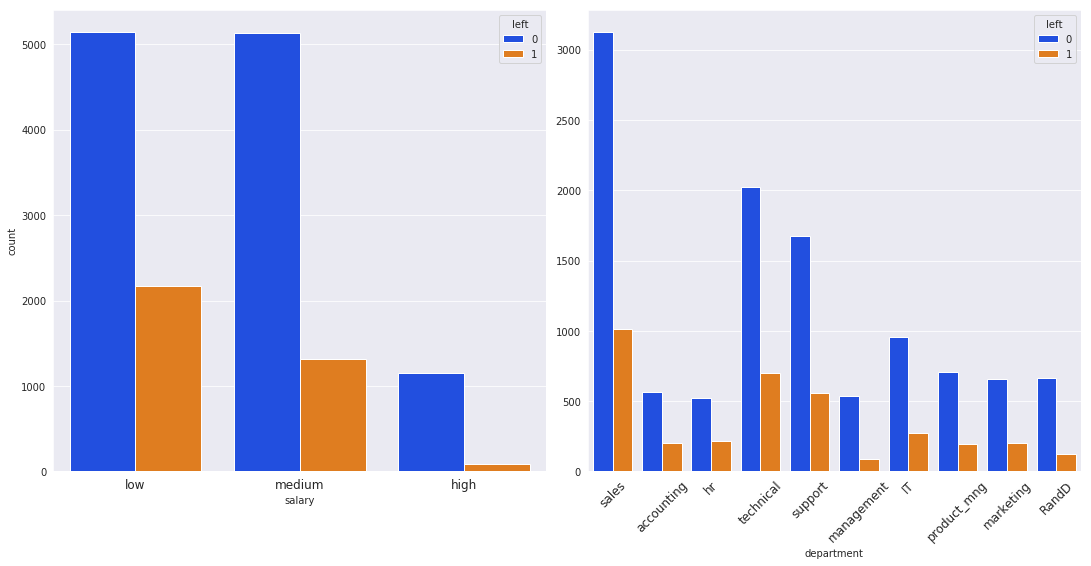

In [6]:
# Let's plot an understanding of the categorical features

sns.set_style('darkgrid')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
fig.tight_layout()
sns.countplot(x='salary', hue='left', data=hr_data, ax=ax1, palette='bright')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12);
sns.countplot(x='department', hue='left', data=hr_data, ax=ax2, palette='bright')
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12, rotation=45);
ax2.set_ylabel(' ');

In [7]:
hr_num_data = hr_data[['satisfaction_level', 'last_evaluation', 'number_project',
                       'average_montly_hours', 'time_spend_company', 'Work_accident',
                       'left', 'promotion_last_5years']]

In [8]:
# Let's get an understanding of the numerical features for employees who left the company

left_nums = hr_num_data[hr_num_data.left==1]

left_nums.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [9]:
# source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

def CorrelationMatrix(df):
    f = plt.figure(figsize=(8, 10))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)

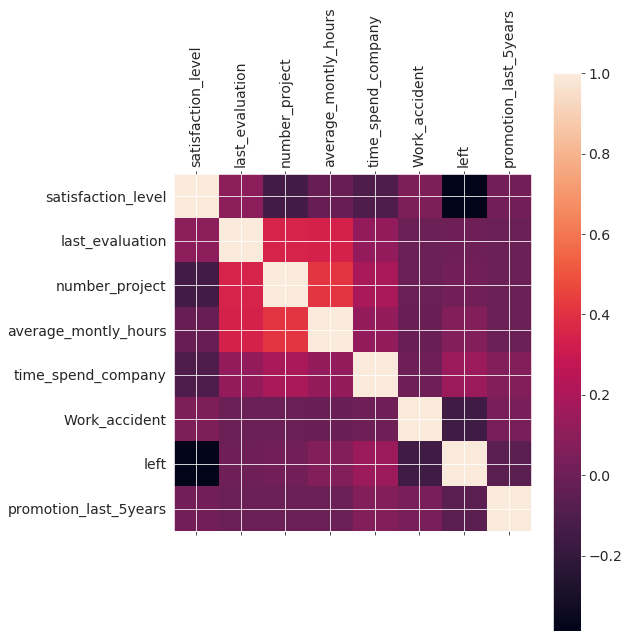

In [10]:
CorrelationMatrix(hr_num_data)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve

In [12]:
X_categorical = hr_data[['department', 'salary']]

In [13]:
# Encode values
X_categorical = pd.concat([pd.get_dummies(X_categorical['department']), 
                           pd.get_dummies(X_categorical['salary'])], axis=1)
X_categorical.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [14]:
# Scale values
y = hr_num_data['left']

hr_data_to_scale = hr_num_data.drop(['left', 'Work_accident'], axis=1)

scaler = StandardScaler()

X_numerical = pd.DataFrame(scaler.fit_transform(hr_data_to_scale), columns=hr_data_to_scale.columns)

In [15]:
# Work_accident is binary and needn't be scaled

X = pd.concat([X_categorical, X_numerical, hr_num_data['Work_accident']], axis=1)
print(X.shape)

(14999, 20)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1867)

In [17]:
# Baseline models
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

lr_preds = logreg.predict(X_test)

lr_results = pd.DataFrame(precision_recall_fscore_support(y_test, lr_preds)).T
lr_results.rename(index={0:'LR_0', 1:'LR_1'},
                  columns={0:'Precision', 1:'Recall', 
                                 2:'F-Score', 3:'Support'}, inplace=True)


randfor = RandomForestClassifier()

randfor.fit(X_train, y_train)

rf_preds = randfor.predict(X_test)

rf_results = pd.DataFrame(precision_recall_fscore_support(y_test, rf_preds)).T
rf_results.rename(index={0:'RF_0', 1:'RF_1'},
                  columns={0:'Precision', 1:'Recall', 
                                 2:'F-Score', 3:'Support'}, inplace=True)
baseline_results = pd.concat([lr_results, rf_results], axis=0)
baseline_results

,Precision,Recall,F-Score,Support
LR_0,0.833979,0.929229,0.879031,3476.0
LR_1,0.607656,0.372070,0.461538,1024.0
RF_0,0.988601,0.997986,0.993271,3476.0
RF_1,0.992936,0.960938,0.976675,1024.0


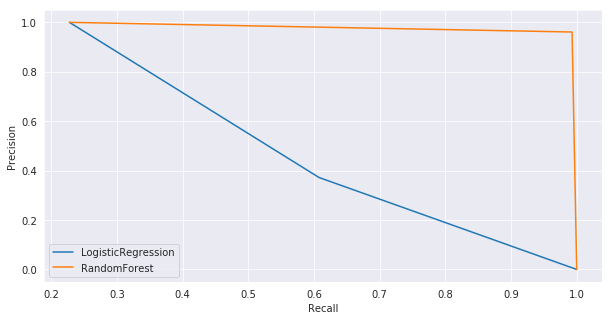

In [18]:
l_prec, l_rec, _ = precision_recall_curve(y_test, lr_preds)
r_prec, r_rec, _ = precision_recall_curve(y_test, rf_preds)

plt.figure(figsize=(10, 5))
plt.plot(l_prec, l_rec, label='LogisticRegression')
plt.plot(r_prec, r_rec, label='RandomForest')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend();

## Findings

Random Forest outperformed the LogisticRegression model significantly, and it carries the advantage of providing feature_importances from the prediction. If we plot these, we can see that **employee satisfaction level, number of projects, time spent with the company, average monthly hours, and the performance at the last evaluation** all influenced whether the model would predict an employee as staying, or leaving the company.

Departments, and various salary levels were not considered as heavily in the prediction process.



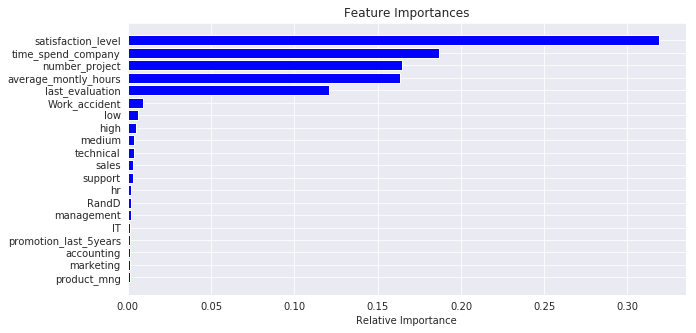

In [19]:
feat_names = X.columns
importances = randfor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()